In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Read the data

In [2]:
# Read tfidf matrices.
test = pd.read_csv("~/Documents/ECS171/split/1/test_data.csv")
train = pd.read_csv("~/Documents/ECS171/split/1/training_data.csv")

# Combine test and training set for tfidf.
combined_tfidf = pd.concat([test, train])

# Read doc2vec data.
combined_d2v = pd.read_csv("~/Documents/ECS171/doc2vec.csv")

In [101]:
combined_tfidf.head()

,aa,aaa,aacs,aah,aaliyah,aaron,ab,aback,abandon,abandoned,...,zuma,zumba,zuppa,zurich,zwilling,zytel,zz,zzz,output1,output2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports_and_Outdoors,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tools_and_Home_Improvement,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pet_Supplies,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Arts_Crafts_and_Sewing,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Books,5


In [3]:
# Convert Vector col from str to vector.
combined_d2v['Vector'] = [np.array(np.matrix(combined_d2v['Vector'][i])).ravel() 
                          for i in range(len(combined_d2v['Vector']))]

# Separate doc2vec vector into columns.
split = pd.DataFrame(combined_d2v['Vector'].values.tolist())
combined_d2v = pd.concat([combined_d2v.iloc[:, 0:2], split], axis=1)

The star ratings and tfidf/doc2vec matrix is in the same dataframe. We have to separate the star ratings from the matrices in order to perform clustering.

In [4]:
# Separate vector and categories/ratings.
#vec_tfidf = scale(combined_tfidf.loc[:, ~combined_tfidf.columns.isin(['output1', 'output2'])].copy())
vec_tfidf = combined_tfidf.loc[:, ~combined_tfidf.columns.isin(['output1', 'output2'])].copy()
outputs_tfidf = combined_tfidf.loc[:, combined_tfidf.columns.isin(['output1', 'output2'])].copy()

# Separate vector and categories/ratings.
#vec_d2v = scale(combined_d2v.loc[:, ~combined_d2v.columns.isin(['cleanText', 'overall'])].copy())
vec_d2v = combined_d2v.loc[:, ~combined_d2v.columns.isin(['cleanText', 'overall'])].copy()
outputs_d2v = combined_d2v.loc[:, combined_d2v.columns.isin(['cleanText', 'overall'])].copy()

# Rename the column with the star rating so that they have the same name.
outputs_tfidf = outputs_tfidf.rename(columns = {'output2' : 'rating'})
outputs_tfidf.head()

outputs_d2v = outputs_d2v.rename(columns = {'overall' : 'rating'})
outputs_d2v.head()

,cleanText,rating
0,love hard find well feel lotion go long way pr...,5
1,crest cool wintergreen pleasant wintergreen fl...,4
2,great shower cap veri long thick hair want was...,5
3,love scent ca get,5
4,let think product toothbrush use sonic wave cl...,3


In [5]:
# Create a scaled version.
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
vec_tfidf_scale = scaler.fit_transform(combined_tfidf.loc[:, ~combined_tfidf.columns.isin(['output1', 'output2'])].copy())
vec_d2v_scale = scaler.fit_transform(combined_d2v.loc[:, ~combined_d2v.columns.isin(['cleanText', 'overall'])].copy())

### k-means

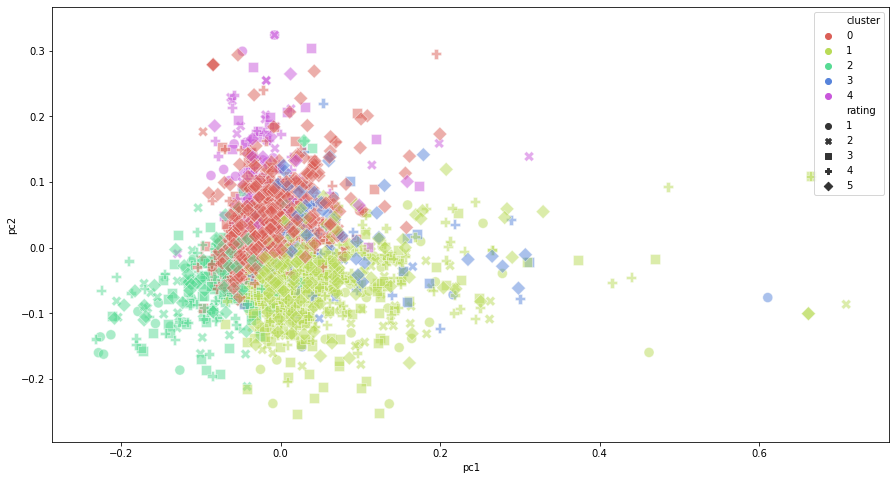

In [43]:
# Plot with class balanced, PCA
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='pc1', y='pc2', data=df, hue='cluster', palette=sns.color_palette("hls", 5), 
                     style = 'rating', s = 100, alpha = 0.5)

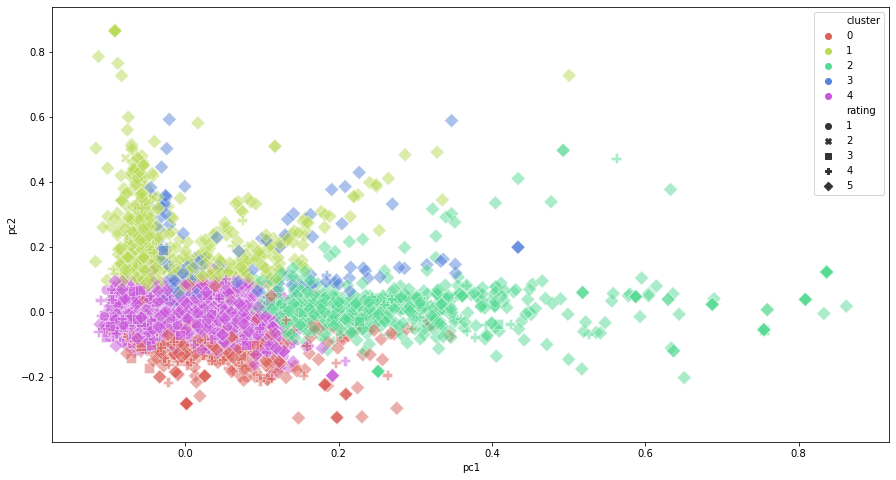

In [70]:
# Plot with class imbalance, PCA
import seaborn as sns
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='pc1', y='pc2', data=df, hue='cluster', palette=sns.color_palette("hls", 5), 
                     style = 'rating', s = 100, alpha = 0.5)

In [79]:
# See how many ratings in each rating category
rating_count = outputs['output2'].value_counts()
rating_count

5    8138
4    2005
3    1060
1     591
2     498
Name: output2, dtype: int64

### Function for k-means

In [4]:
def perform_kmeans(df_labels, df_vec, num_clusters):
    """
    Input:
        df_labels -- dataframe with the true labels
        tfidf -- tfidf matrix
        num_clusters -- number of clusters
    Output: 
        df with k-means clusters
    """
    # K-means clustering with 5 clusters
    km = KMeans(n_clusters = num_clusters)
    km.fit(df_vec)
    clusters = km.labels_.tolist()
    
    # Add cluster labels to dataframe
    df_labels['cluster'] = clusters
    
    return df_labels

In [22]:
# # K-means results with tfidf
# df_tfidf_kmeans = perform_kmeans(outputs_tfidf, vec_tfidf, 5)

In [27]:
# # K-means results with doc2vec
# df_d2v_kmeans = perform_kmeans(outputs_d2v, vec_d2v, 5)

In [10]:
# K-means results with tfidf
df_tfidf_kmeans_scale = perform_kmeans(outputs_tfidf, vec_tfidf_scale, 5)

In [11]:
# K-means results with doc2vec
df_d2v_kmeans_scale = perform_kmeans(outputs_d2v, vec_d2v_scale, 5)

In [5]:
# Pickle kmeans dataframes so we don't have to re run kmeans.
# df_tfidf_kmeans.to_pickle("./kmeans/df_tfidf_kmeans")
# df_d2v_kmeans.to_pickle("./kmeans/df_d2v_kmeans")
# df_tfidf_kmeans_scale.to_pickle("./kmeans/df_tfidf_kmeans_scale")
# df_d2v_kmeans_scale.to_pickle("./kmeans/df_d2v_kmeans_scale")

df_tfidf_kmeans = pd.read_pickle("./kmeans/df_tfidf_kmeans")
df_d2v_kmeans = pd.read_pickle("./kmeans/df_d2v_kmeans")
# df_tfidf_kmeans_scale = pd.read_pickle("./kmeans/df_tfidf_kmeans_scale")
# df_d2v_kmeans_scale = pd.read_pickle("./kmeans/df_d2v_kmeans_scale")

### Function for PCA

In [5]:
def perform_pca(df_labels, df_vec):
    # Perform PCA
    pca = PCA(n_components = 2)
    pca_result = pca.fit_transform(df_vec)
    pc1, pc2 = pca_result[:, 0], pca_result[:, 1]
    
    # Create df with labels, clusters, and principle components
    #df = pd.DataFrame(dict(cat=outputs['output1'], rating=outputs['output2'], cluster=clusters, pc1=pc1, pc2=pc2))
    df = pd.DataFrame(dict(rating=df_labels['rating'], cluster=df_labels['cluster'], pc1=pc1, pc2=pc2))
    
    return df

In [7]:
pca_tfidf = perform_pca(df_tfidf_kmeans, vec_tfidf)

In [ ]:
# pca_tfidf.to_pickle("./kmeans/pca_tfidf")
# pca_tfidf = pd.read_pickle("./kmeans/pca_tfidf")

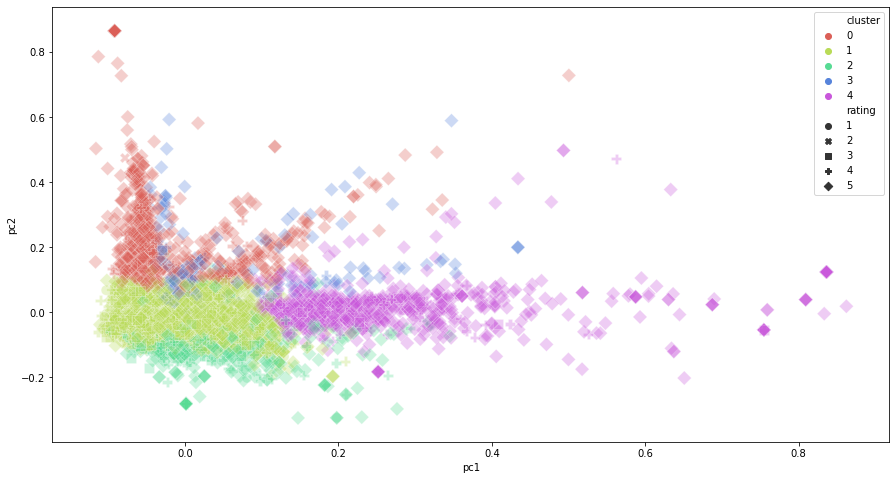

In [9]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='pc1', y='pc2', data=pca_tfidf, hue='cluster', palette=sns.color_palette("hls", 5), 
                     style = 'rating', s = 100, alpha = 0.3)

In [10]:
pca_d2v = perform_pca(df_d2v_kmeans, vec_d2v)

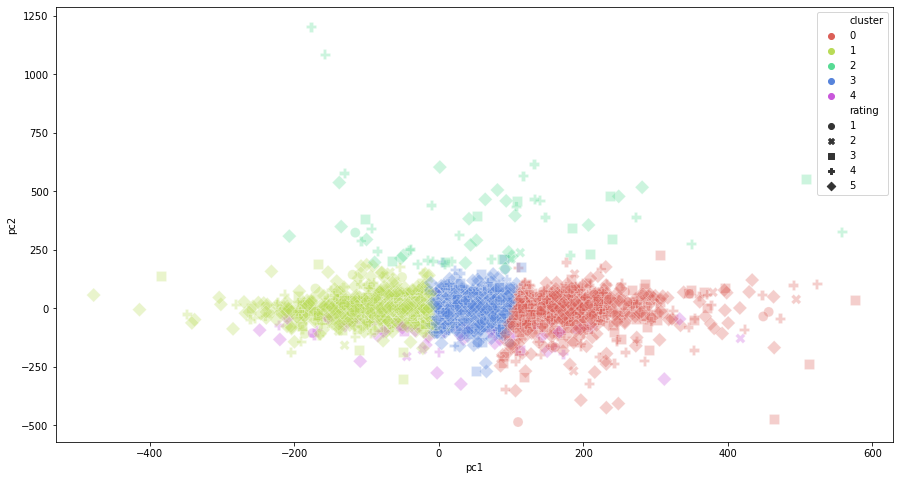

In [11]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='pc1', y='pc2', data=pca_d2v, hue='cluster', palette=sns.color_palette("hls", 5), 
                     style = 'rating', s = 100, alpha = 0.3)

### plotting function

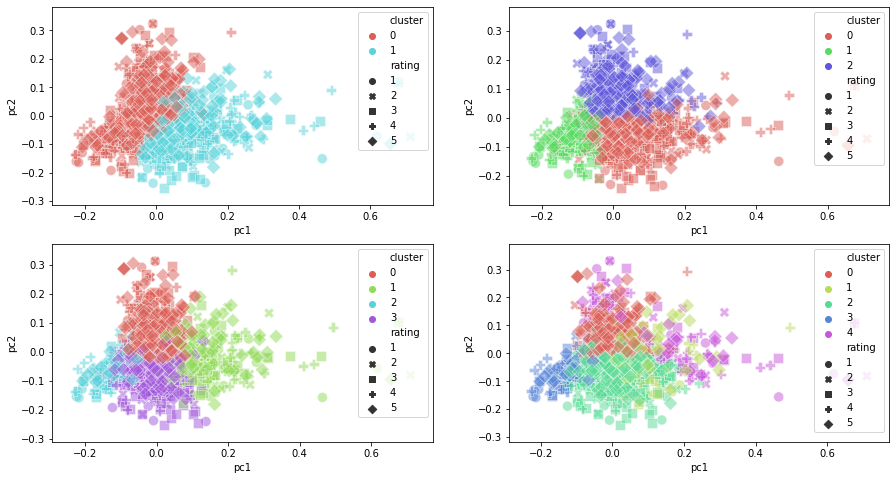

In [56]:
fig = plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
plot_kmeans_pca(outputs, tfidf, 2)

plt.subplot(2, 2, 2)
plot_kmeans_pca(outputs, tfidf, 3)

plt.subplot(2, 2, 3)
plot_kmeans_pca(outputs, tfidf, 4)

plt.subplot(2, 2, 4)
plot_kmeans_pca(outputs, tfidf, 5)

plt.show()

### Dimensionality reduction with t-SNE

In [19]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(tfidf.values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2490 samples in 3.661s...
[t-SNE] Computed neighbors for 2490 samples in 292.914s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2490
[t-SNE] Computed conditional probabilities for sample 2000 / 2490
[t-SNE] Computed conditional probabilities for sample 2490 / 2490
[t-SNE] Mean sigma: 0.289152
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.868690
[t-SNE] KL divergence after 300 iterations: 2.821809


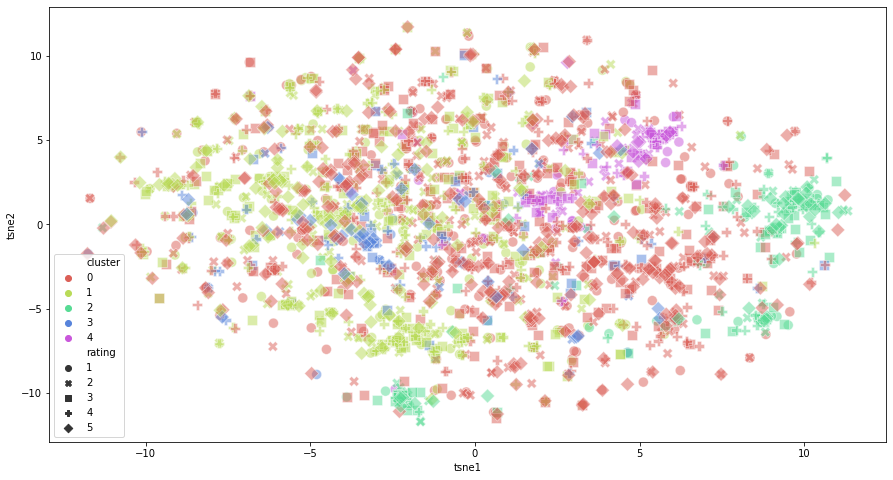

In [30]:
tsne1, tsne2 = tsne_results[:, 0], tsne_results[:, 1]

# Create df with labels, clusters, and principle components
df = pd.DataFrame(dict(cat=outputs['output1'], rating=outputs['output2'], cluster=clusters, 
                       tsne1=tsne1, tsne2=tsne2))

# Plot with class balanced
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='tsne1', y='tsne2', data=df, hue='cluster', palette=sns.color_palette("hls", num_clusters), 
                 style = 'rating', s = 100, alpha = 0.5)
plt.show()

In [75]:
def plot_kmeans_tsne(df_labels, tfidf, num_clusters):
    """
    Input:
        df_labels -- dataframe with the true labels
        tfidf -- tfidf matrix
        num_clusters -- number of clusters
    Output: 
        k-means plot
    """
    # K-means clustering with 5 clusters
    km = KMeans(n_clusters = num_clusters)
    km.fit(tfidf)
    clusters = km.labels_.tolist()
    
    # Add cluster labels to dataframe
    outputs['cluster'] = clusters
    
    # Perform tsne
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(tfidf.values)
    tsne1, tsne2 = tsne_results[:, 0], tsne_results[:, 1]

    # Create df with labels, clusters, and principle components
    df = pd.DataFrame(dict(cat=outputs['output1'], rating=outputs['output2'], cluster=clusters, 
                           tsne1=tsne1, tsne2=tsne2))
    
    # Plot with class balanced
    plt.figure(figsize=(15,8))
    ax = sns.scatterplot(x='tsne1', y='tsne2', data=df, hue='cluster', palette=sns.color_palette("hls", num_clusters), 
                     style = 'rating', s = 100, alpha = 0.5)
    plt.show()

### Downsample

In [6]:
# Fix class imbalance by downsampling.
tmp_tfidf = combined_tfidf.groupby(['output2'], group_keys=False)
balanced_df_tfidf = pd.DataFrame(tmp_tfidf.apply(lambda x: x.sample(tmp_tfidf.size().min()))).reset_index(drop=True)

tmp_d2v = combined_d2v.groupby(['overall'], group_keys=False)
balanced_df_d2v = pd.DataFrame(tmp_d2v.apply(lambda x: x.sample(tmp_d2v.size().min()))).reset_index(drop=True)

# Separate vector and categories/ratings. Scale the vectors to get mean 0 and var 1.
#vec_tfidf = scale(combined_tfidf.loc[:, ~combined_tfidf.columns.isin(['output1', 'output2'])].copy())
vec_tfidf = balanced_df_tfidf.loc[:, ~balanced_df_tfidf.columns.isin(['output1', 'output2'])].copy()
outputs_tfidf = balanced_df_tfidf.loc[:, balanced_df_tfidf.columns.isin(['output1', 'output2'])].copy()

# Separate vector and categories/ratings. Scale the vectors to get mean 0 and var 1.
#vec_d2v = scale(combined_d2v.loc[:, ~combined_d2v.columns.isin(['cleanText', 'overall'])].copy())
vec_d2v = balanced_df_d2v.loc[:, ~balanced_df_d2v.columns.isin(['cleanText', 'overall'])].copy()
outputs_d2v = balanced_df_d2v.loc[:, balanced_df_d2v.columns.isin(['cleanText', 'overall'])].copy()

# rename column
outputs_tfidf = outputs_tfidf.rename(columns = {'output2' : 'rating'})
outputs_tfidf.head()

outputs_d2v = outputs_d2v.rename(columns = {'overall' : 'rating'})
outputs_d2v.head()

,cleanText,rating
0,buy shoe black match work uniform mail super n...,1
1,zipper break first day top front pocket small ...,1
2,bad radio work two year weather radio quit dif...,1
3,speaker year bare use shelf month plug tri get...,1
4,buy one soft practic crimp brake,1


In [7]:
outputs_d2v.rating.value_counts()

5    495
3    495
1    495
4    495
2    495
Name: rating, dtype: int64

In [103]:
def perform_tsne(df_labels, df_vec, lr):
    """
    Input:
        df_labels -- dataframe with the true labels
        tfidf -- tfidf matrix
        num_clusters -- number of clusters
    Output: 
        df with k-means clusters
    """
    # Perform tsne
    #tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
    tsne = TSNE(n_components=2, learning_rate = lr)
    tsne_results = tsne.fit_transform(df_vec)
    tsne1, tsne2 = tsne_results[:, 0], tsne_results[:, 1]
    
    # Create df with labels, clusters, and principle components
    #df = pd.DataFrame(dict(cat=outputs['output1'], rating=outputs['output2'], cluster=clusters, pc1=pc1, pc2=pc2))
    df = pd.DataFrame(dict(rating=df_labels['rating'], cluster=df_labels['cluster'], tsne1=tsne1, tsne2=tsne2))
    
    return df

In [11]:
# df_tfidf_kmeans = perform_kmeans(outputs_tfidf, vec_tfidf, 5)
# df_d2v_kmeans = perform_kmeans(outputs_d2v, vec_d2v, 5)

# df_tfidf_kmeans.to_pickle("./kmeans/df_tfidf_tsne_balanced")
# df_d2v_kmeans.to_pickle("./kmeans/df_d2v_tsne_balanced")
df_tfidf_tsne_balanced = pd.read_pickle("./kmeans/df_tfidf_tsne_balanced")
df_d2v_tsne_balanced = pd.read_pickle("./kmeans/df_d2v_tsne_balanced")

In [29]:
#df_tfidf_tsne = perform_tsne(df_tfidf_kmeans, vec_tfidf)

In [34]:
#df_tfidf_tsne.to_pickle("./kmeans/df_tfidf_tsne")
df_tfidf_tsne = pd.read_pickle("./kmeans/df_tfidf_tsne")

### test different learning rates

In [ ]:
df_tfidf_tsne = perform_tsne(df_tfidf_kmeans, vec_tfidf, 300)
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='tsne1', y='tsne2', data=df_tfidf_tsne, hue='cluster', palette=sns.color_palette("hls", 5), 
                 style = 'rating', s = 100, alpha = 0.7)

In [ ]:
df_d2v_tsne = perform_tsne(df_d2v_kmeans, vec_d2v, 500)
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='tsne1', y='tsne2', data=df_d2v_tsne, hue='cluster', palette=sns.color_palette("hls", 5), 
                 style = 'rating', s = 100, alpha = 0.7)

### Final plots

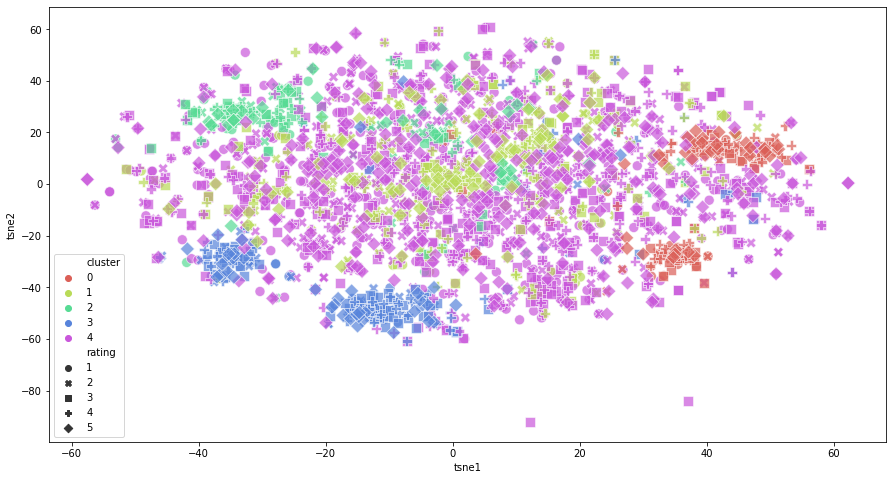

In [71]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='tsne1', y='tsne2', data=df_tfidf_tsne, hue='cluster', palette=sns.color_palette("hls", 5), 
                 style = 'rating', s = 100, alpha = 0.7)

In [31]:
df_d2v_tsne = perform_tsne(df_d2v_kmeans, vec_d2v)

In [36]:
#df_d2v_tsne.to_pickle("./kmeans/df_d2v_tsne")
df_d2v_tsne = pd.read_pickle("./kmeans/df_d2v_tsne")

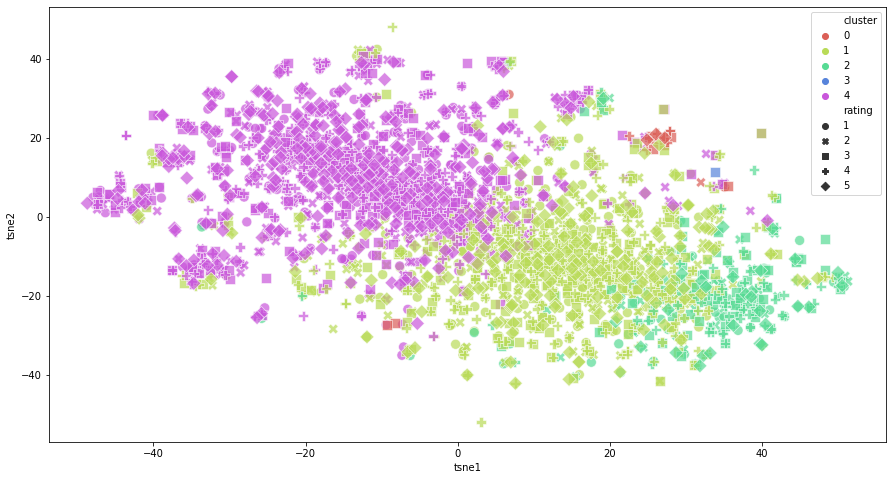

In [74]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='tsne1', y='tsne2', data=df_d2v_tsne, hue='cluster', palette=sns.color_palette("hls", 5), 
                 style = 'rating', s = 100, alpha = 0.7)

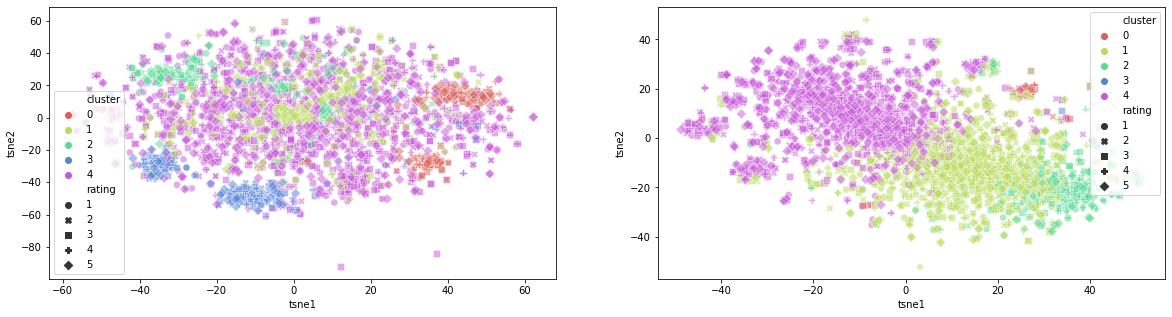

In [81]:
# combine plots
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
ax = sns.scatterplot(x='tsne1', y='tsne2', data=df_tfidf_tsne, hue='cluster', palette=sns.color_palette("hls", 5), 
                 style = 'rating', s = 50, alpha = 0.5)

plt.subplot(1, 2, 2)
ax = sns.scatterplot(x='tsne1', y='tsne2', data=df_d2v_tsne, hue='cluster', palette=sns.color_palette("hls", 5), 
                 style = 'rating', s = 50, alpha = 0.5)

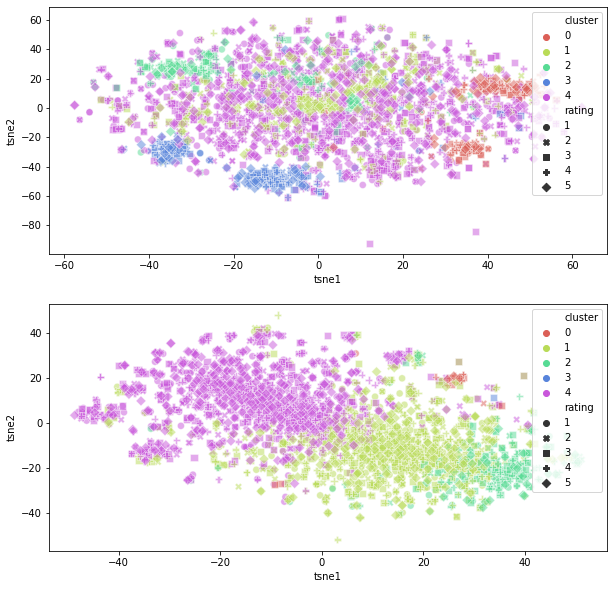

In [90]:
fig = plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
ax = sns.scatterplot(x='tsne1', y='tsne2', data=df_tfidf_tsne, hue='cluster', palette=sns.color_palette("hls", 5), 
                 style = 'rating', s = 50, alpha = 0.5)

plt.subplot(2, 1, 2)
ax = sns.scatterplot(x='tsne1', y='tsne2', data=df_d2v_tsne, hue='cluster', palette=sns.color_palette("hls", 5), 
                 style = 'rating', s = 50, alpha = 0.5)